In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
data = pd.read_csv('ad_10000records.csv')
data

,DailyTimeSpentOnSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,ClickedOnAd
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1


In [176]:
data.shape

(10000, 10)

In [177]:
data.info

<bound method DataFrame.info of       DailyTimeSpentOnSite   Age  AreaIncome  DailyInternetUsage  \
0                    62.26  32.0    69481.85              172.83   
1                    41.73  31.0    61840.26              207.17   
2                    44.40  30.0    57877.15              172.83   
3                    59.88  28.0    56180.93              207.17   
4                    49.21  30.0    54324.73              201.58   
...                    ...   ...         ...                 ...   
9995                 41.73  31.0    61840.26              207.17   
9996                 41.73  28.0    51501.38              120.49   
9997                 55.60  39.0    38067.08              124.44   
9998                 46.61  50.0    43974.49              123.13   
9999                 46.61  43.0    60575.99              198.45   

                                 AdTopicLine             City  Gender  \
0            Decentralized real-time circuit         Lisafort    Male   
1    

In [209]:
data.isnull().sum()

DailyTimeSpentOnSite    0
Age                     0
AreaIncome              0
DailyInternetUsage      0
AdTopicLine             0
City                    0
Gender                  0
Country                 0
Timestamp               0
ClickedOnAd             0
group                   0
PartOfDay               0
dtype: int64

In [210]:
data.duplicated().sum()

215

In [212]:
data = data.drop_duplicates()
data.shape

(9785, 12)

In [178]:
plot_df = data.AdTopicLine.value_counts()
plot_df

Cloned explicit middleware                 344
Streamlined homogeneous analyzer           212
Business-focused transitional solution     207
Sharable reciprocal project                187
Intuitive exuding service-desk             173
                                          ... 
Ergonomic neutral portal                     1
Implemented uniform synergy                  1
Visionary multi-tasking alliance             1
Inverse zero tolerance customer loyalty      1
Reactive interactive protocol                1
Name: AdTopicLine, Length: 559, dtype: int64

In [179]:
plot_df = data.City.value_counts()
plot_df

Hubbardmouth       336
West Brandonton    275
Lisafort           261
Wintersfort        230
Stewartbury        207
                  ... 
Turnerview           1
North Tiffany        1
North Kristine       1
East Troyhaven       1
Davidview            1
Name: City, Length: 521, dtype: int64

In [180]:
plot_df = data.Country.value_counts()
plot_df

Australia                                       388
Czech Republic                                  330
Turkey                                          312
Qatar                                           224
Hong Kong                                       221
                                               ... 
South Georgia and the South Sandwich Islands      1
Wallis and Futuna                                 1
Sierra Leone                                      1
Niue                                              1
Paraguay                                          1
Name: Country, Length: 207, dtype: int64

<AxesSubplot: >

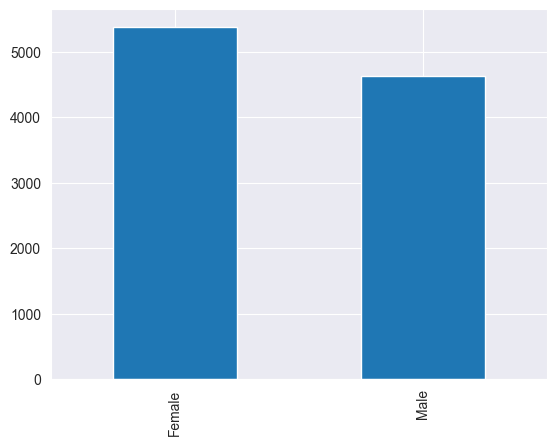

In [181]:
plot_df = data.Gender.value_counts()
plot_df.plot(kind="bar")

In [182]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

# Assuming the text data is in the 'text' column
text_data = data['AdTopicLine'].tolist()

# Vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Cluster the text data using DBSCAN
model = DBSCAN(eps=0.5, min_samples=2)
labels = model.fit_predict(X)

# Group the text data by cluster
groups = [[] for _ in set(labels)]
for i, label in enumerate(labels):
    groups[label].append(text_data[i])

# Add the groups as a new column to the original dataset
data['group'] = labels

data

,DailyTimeSpentOnSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,ClickedOnAd,group
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,2
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,3
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1,256
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0,61
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0,15
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1,169


In [183]:
data.group.value_counts()

47     344
40     212
43     207
52     187
15     173
      ... 
360      2
356      2
353      2
349      2
448      2
Name: group, Length: 450, dtype: int64

Let's check the relation of the clicking and daily time spent on site.

Text(0.5, 1.0, 'Relationship between Clicking and Daily time spent on site')

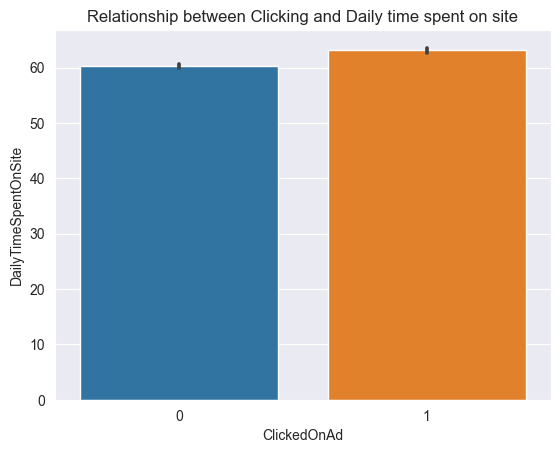

In [184]:
sns.barplot(x='ClickedOnAd', y='DailyTimeSpentOnSite', data=data)
plt.title('Relationship between Clicking and Daily time spent on site')

Text(0.5, 1.0, 'Distribution of Daily time spent on site by Clicking')

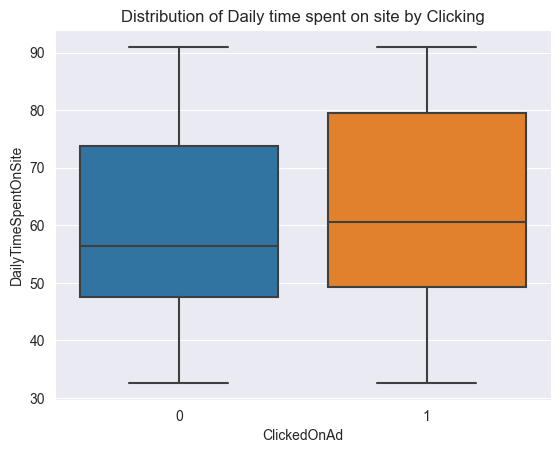

In [185]:
sns.boxplot(x='ClickedOnAd', y='DailyTimeSpentOnSite', data=data)
plt.title('Distribution of Daily time spent on site by Clicking')

Text(0.5, 1.0, 'Distribution of Daily time spent on site by Clicking')

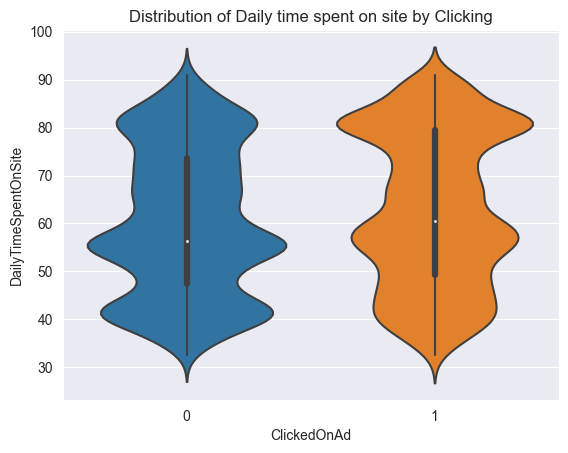

In [186]:
sns.violinplot(x='ClickedOnAd', y='DailyTimeSpentOnSite', data=data)
plt.title('Distribution of Daily time spent on site by Clicking')

Text(0.5, 0.98, 'Distribution of Daily time spent on site by Clicking')

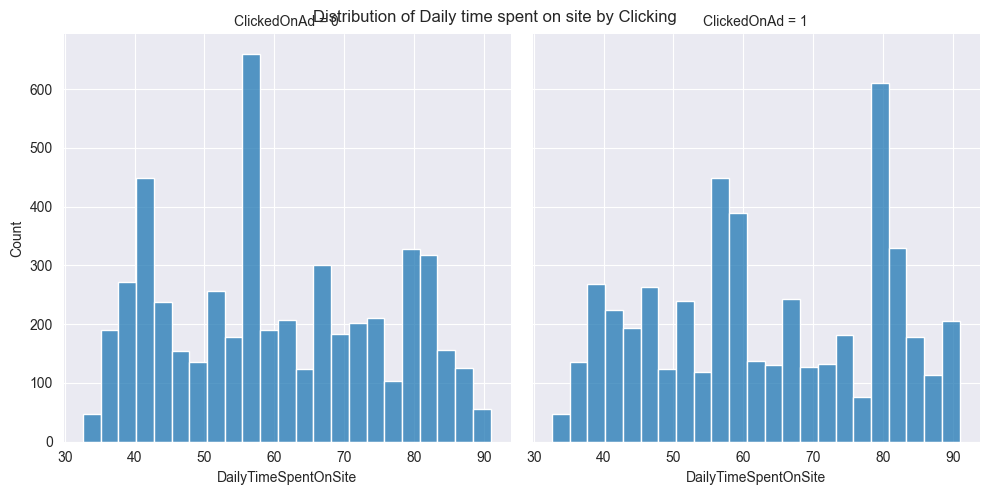

In [187]:
sns.displot(data=data, x='DailyTimeSpentOnSite', col='ClickedOnAd', kind='hist')
plt.suptitle('Distribution of Daily time spent on site by Clicking')

Now check the clicking and age

Text(0.5, 1.0, 'Relationship between Clicking and Age')

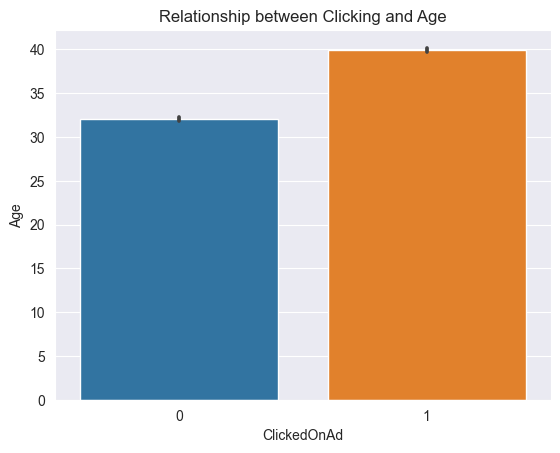

In [188]:
sns.barplot(x='ClickedOnAd', y='Age', data=data)
plt.title('Relationship between Clicking and Age')

Text(0.5, 1.0, 'Distribution of Age by Clicking')

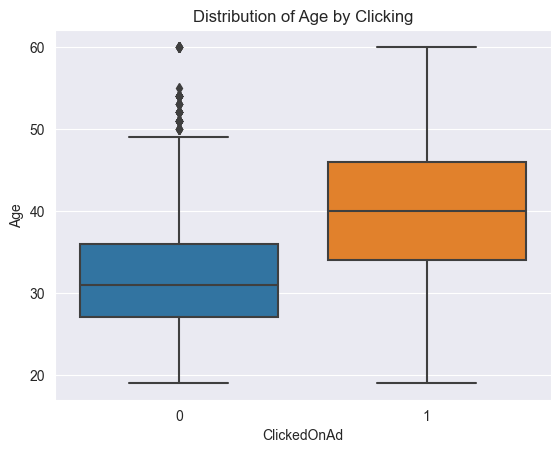

In [189]:
sns.boxplot(x='ClickedOnAd', y='Age', data=data)
plt.title('Distribution of Age by Clicking')

Text(0.5, 1.0, 'Distribution of Age by Clicking')

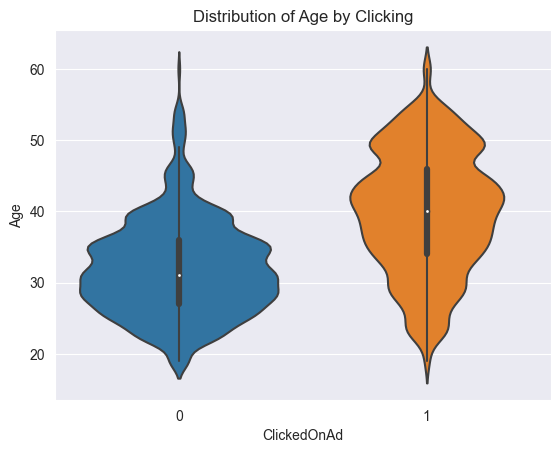

In [190]:
sns.violinplot(x='ClickedOnAd', y='Age', data=data)
plt.title('Distribution of Age by Clicking')

Text(0.5, 0.98, 'Distribution of Age by Clicking')

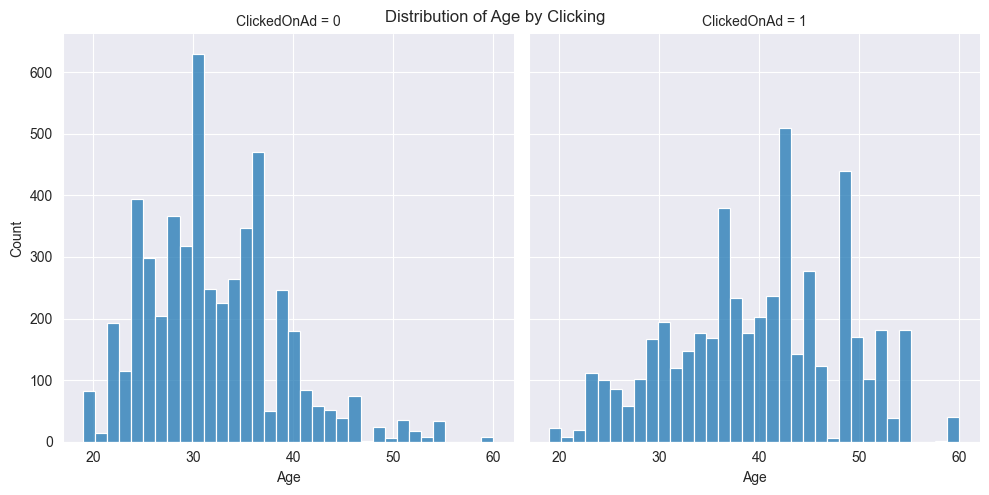

In [191]:
sns.displot(data=data, x='Age', col='ClickedOnAd', kind='hist')
plt.suptitle('Distribution of Age by Clicking')

Let's check the Area Income and clicking

Text(0.5, 1.0, 'Relationship between Clicking and AreaIncome')

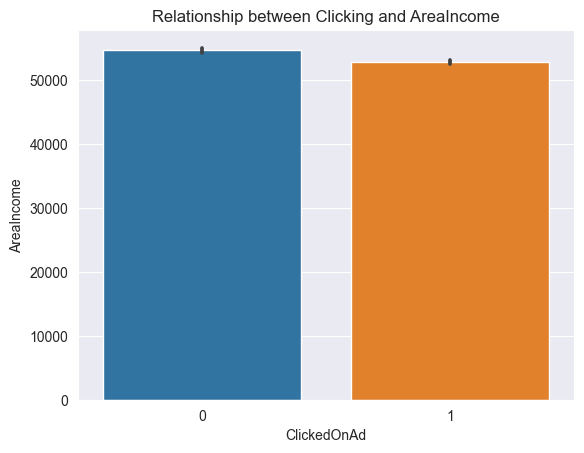

In [192]:
sns.barplot(x='ClickedOnAd', y='AreaIncome', data=data)
plt.title('Relationship between Clicking and AreaIncome')

Text(0.5, 1.0, 'Distribution of AreaIncome by Clicking')

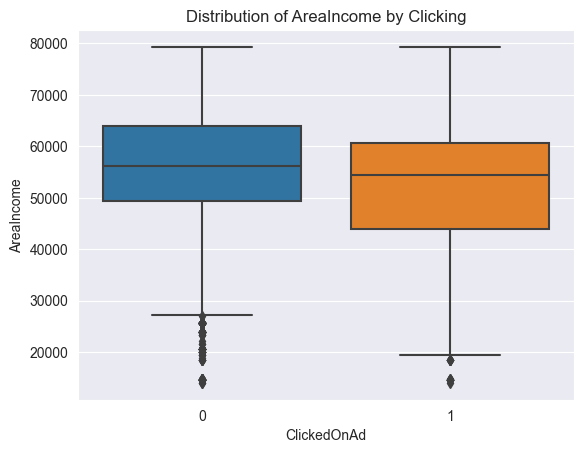

In [193]:
sns.boxplot(x='ClickedOnAd', y='AreaIncome', data=data)
plt.title('Distribution of AreaIncome by Clicking')

Text(0.5, 1.0, 'Distribution of AreaIncome by Clicking')

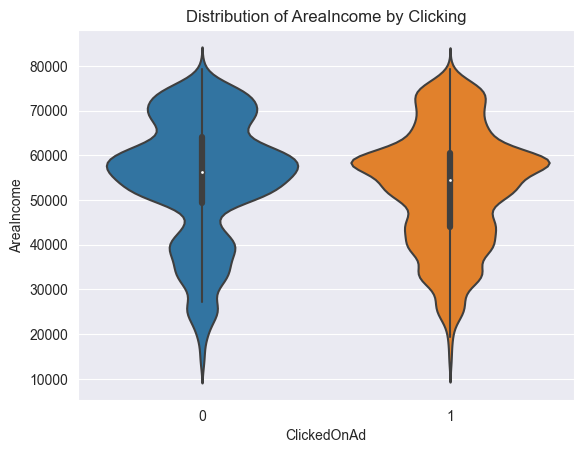

In [194]:
sns.violinplot(x='ClickedOnAd', y='AreaIncome', data=data)
plt.title('Distribution of AreaIncome by Clicking')

Text(0.5, 0.98, 'Distribution of AreaIncome by Clicking')

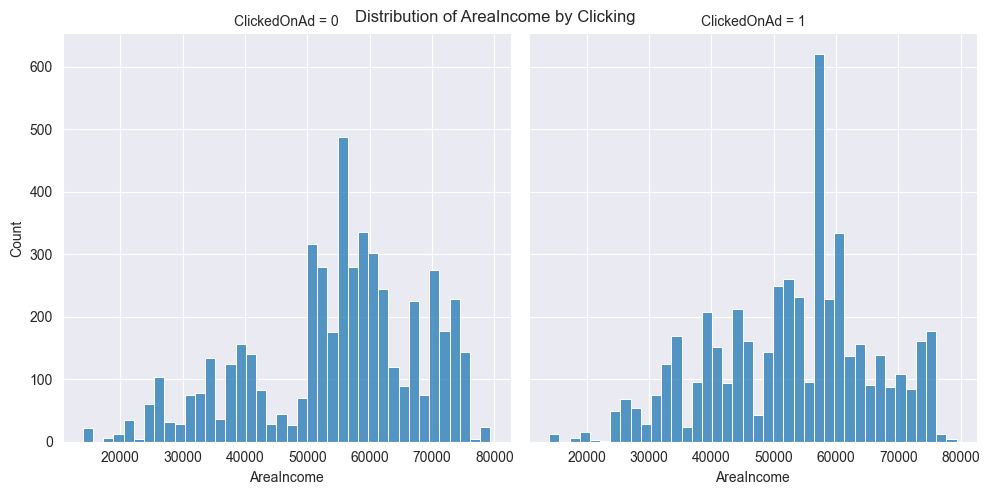

In [195]:
sns.displot(data=data, x='AreaIncome', col='ClickedOnAd', kind='hist')
plt.suptitle('Distribution of AreaIncome by Clicking')

Now the time spent in the site and the internet usage.

Text(0.5, 1.0, 'Correlation Matrix')

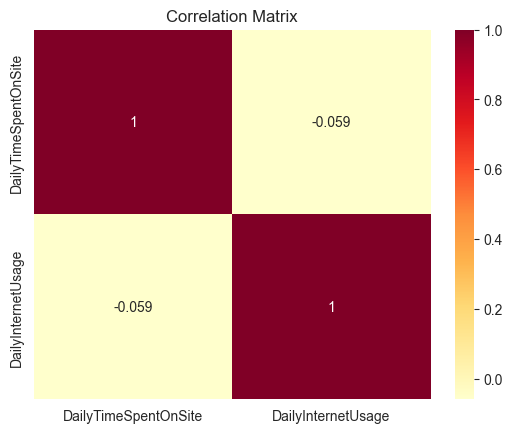

In [196]:
corr_matrix = data[['DailyTimeSpentOnSite', 'DailyInternetUsage']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')

Now usage of internet and clicking

Text(0.5, 1.0, 'Relationship between Clicking and Age')

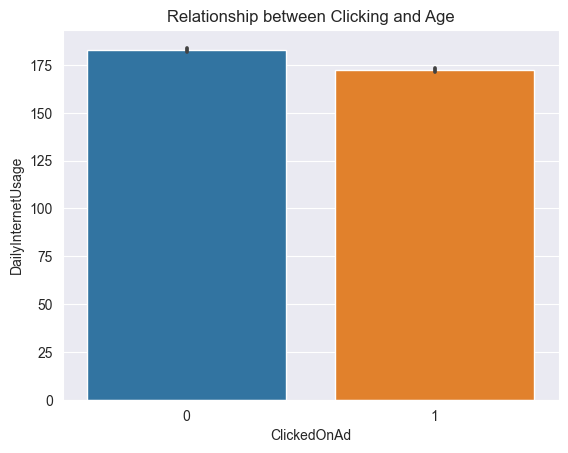

In [197]:
sns.barplot(x='ClickedOnAd', y='DailyInternetUsage', data=data)
plt.title('Relationship between Clicking and Age')

Text(0.5, 1.0, 'Distribution of AreaIncome by Clicking')

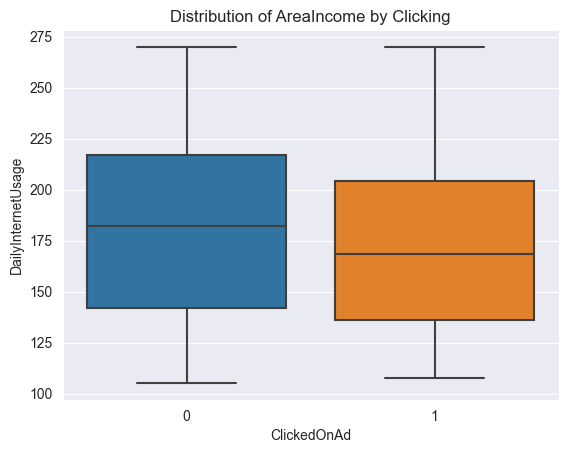

In [198]:
sns.boxplot(x='ClickedOnAd', y='DailyInternetUsage', data=data)
plt.title('Distribution of AreaIncome by Clicking')

Text(0.5, 1.0, 'Distribution of AreaIncome by Clicking')

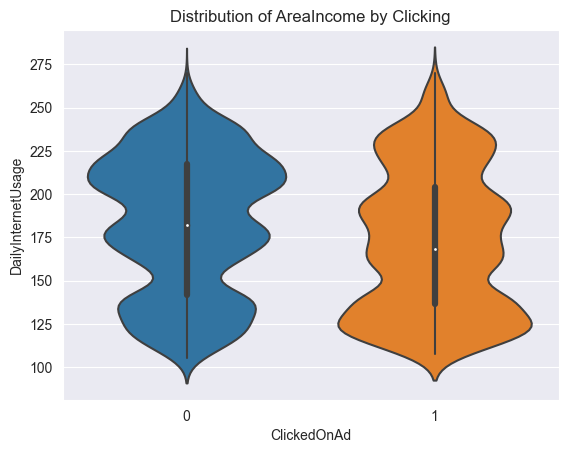

In [199]:
sns.violinplot(x='ClickedOnAd', y='DailyInternetUsage', data=data)
plt.title('Distribution of AreaIncome by Clicking')

Text(0.5, 0.98, 'Distribution of AreaIncome by Clicking')

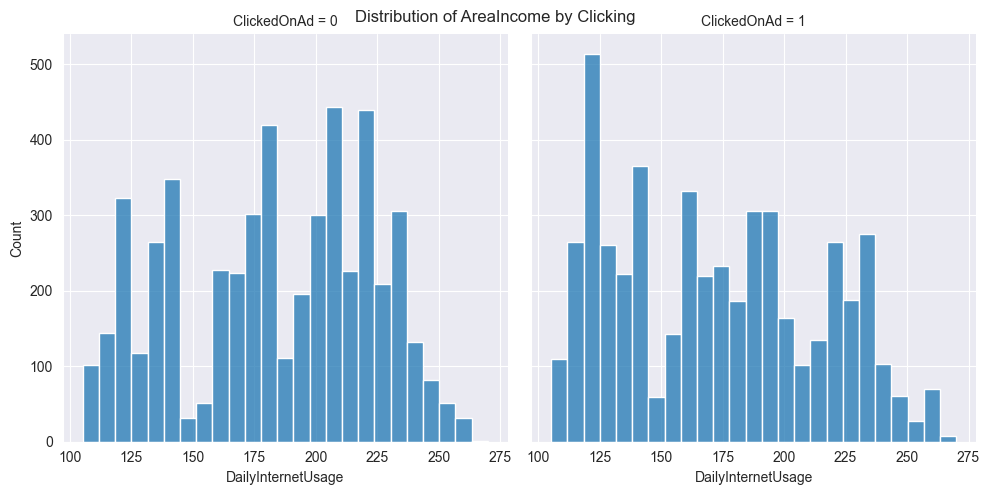

In [200]:
sns.displot(data=data, x='DailyInternetUsage', col='ClickedOnAd', kind='hist')
plt.suptitle('Distribution of AreaIncome by Clicking')

Text(0.5, 1.0, 'Correlation Matrix')

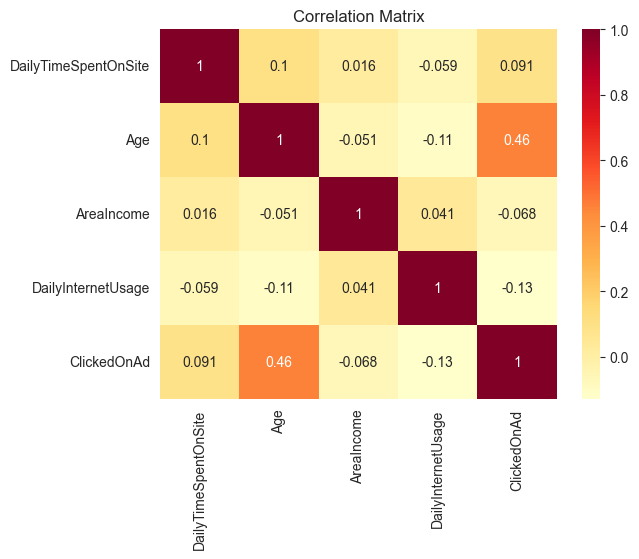

In [201]:
corr_matrix = data[['DailyTimeSpentOnSite', 'Age', 'AreaIncome', 'DailyInternetUsage', 'ClickedOnAd']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')

Gender and clicking

Text(0.5, 1.0, 'Relationship between gender and clicking')

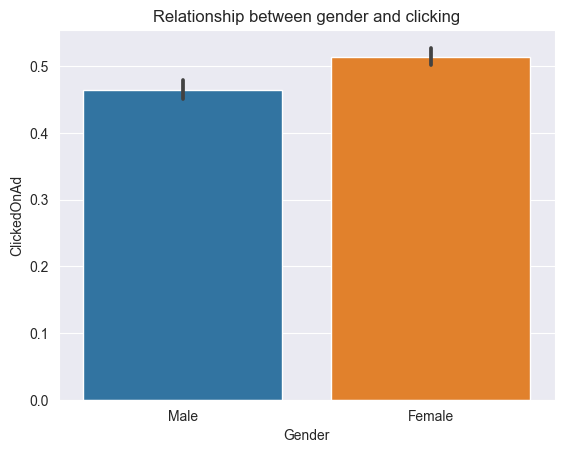

In [202]:
sns.barplot(x='Gender', y='ClickedOnAd', data=data)
plt.title('Relationship between gender and clicking')

Text(0.5, 1.0, 'Proportions of Gender by Clicking Groups')

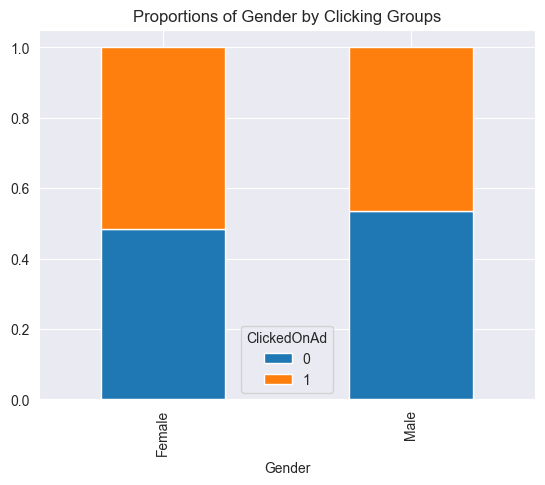

In [203]:
data.groupby('Gender')['ClickedOnAd'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Proportions of Gender by Clicking Groups')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17144\2488142318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix['Gender'] = encoder.fit_transform(matrix[['Gender']])


Text(0.5, 1.0, 'Correlation Matrix')

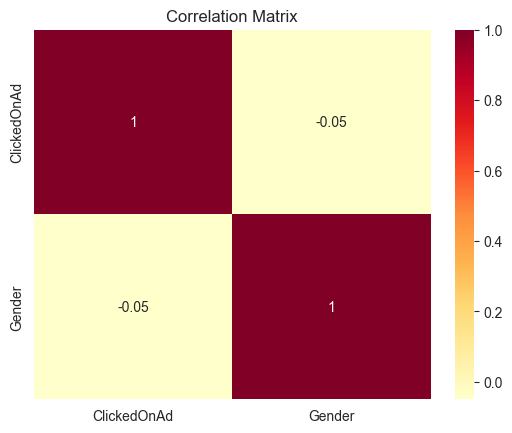

In [204]:
from sklearn.preprocessing import OrdinalEncoder

matrix = data[['ClickedOnAd', 'Gender']]
encoder = OrdinalEncoder()
matrix['Gender'] = encoder.fit_transform(matrix[['Gender']])
corr_matrix = matrix.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')

In [205]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the hour ranges for each part of the day
parts_of_day = {
    'Morning': (6, 12),
    'Noon': (12, 14),
    'Afternoon': (14, 18),
    'Evening': (18, 21),
    'Night': [(0, 6), (21, 24)]
}

# Create a new column with the part of the day
data['PartOfDay'] = data['Timestamp'].dt.hour.apply(lambda hour: next((part for part, hours in parts_of_day.items() if isinstance(hours, tuple) and hours[0] <= hour < hours[1] or isinstance(hours, list) and any(h[0] <= hour < h[1] for h in hours)), 'Unknown'))
data

,DailyTimeSpentOnSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,ClickedOnAd,group,PartOfDay
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,0,Night
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,1,Afternoon
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,2,Morning
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,3,Afternoon
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,2,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1,256,Night
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0,61,Noon
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0,15,Morning
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1,169,Morning


In [206]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'] = data['Timestamp'].dt.time
data

,DailyTimeSpentOnSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Gender,Country,Timestamp,ClickedOnAd,group,PartOfDay
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,21:43:05,0,0,Night
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,17:56:05,0,1,Afternoon
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,10:50:45,0,2,Morning
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,14:32:32,0,3,Afternoon
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,10:54:35,1,2,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,03:22:15,1,256,Night
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,12:20:15,0,61,Noon
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,11:53:17,0,15,Morning
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,07:07:46,1,169,Morning


<AxesSubplot: >

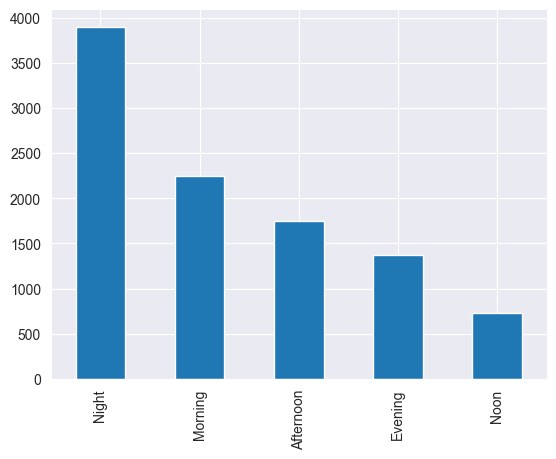

In [207]:
plot_df = data.PartOfDay.value_counts()
plot_df.plot(kind="bar")

Text(0.5, 1.0, 'Proportions of Part of day by Clicking Groups')

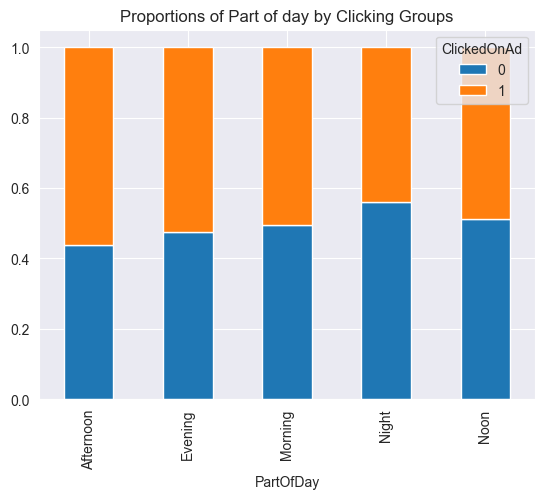

In [208]:
data.groupby('PartOfDay')['ClickedOnAd'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Proportions of Part of day by Clicking Groups')

In [214]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = data.drop(['ClickedOnAd', 'Timestamp', 'Country', 'City', 'AdTopicLine'], axis=1)
y = data['ClickedOnAd']

encoder = OrdinalEncoder()
X['Gender'] = encoder.fit_transform(X[['Gender']])
X = pd.get_dummies(X, columns=['PartOfDay'])
# Fit and estimate the error for different classification models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC()
]

for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

LogisticRegression accuracy: 0.69 (+/- 0.02)
DecisionTreeClassifier accuracy: 0.74 (+/- 0.02)
RandomForestClassifier accuracy: 0.79 (+/- 0.01)
KNeighborsClassifier accuracy: 0.74 (+/- 0.02)
SVC accuracy: 0.55 (+/- 0.02)
